In [1]:
import numpy as np
import mlp
import read_mnist
import read_indian
import matplotlib.pyplot as plt
%matplotlib inline

Read in mnist data and preprocess the data (normalize inputs to 0-1 and one hot encode outputs)

In [2]:
train_images = read_mnist.read_images("mnist/train_images")
test_images  = read_mnist.read_images("mnist/test_images")
train_labels = read_mnist.read_labels("mnist/train_labels")
test_labels  = read_mnist.read_labels("mnist/test_labels")

train_images = read_mnist.preprocess_images(train_images, 1)
test_images  = read_mnist.preprocess_images(test_images, 1)
train_labels = read_mnist.preprocess_labels(train_labels, 1)
test_labels  = read_mnist.preprocess_labels(test_labels, 1)

Magic is: 2051
Number of images is: 60000
Number of rows is: 28
Number of cols is: 28
Magic is: 2051
Number of images is: 10000
Number of rows is: 28
Number of cols is: 28
Magic is: 2049
Num of labels is: 60000
Magic is: 2049
Num of labels is: 10000


Add a validation set that is a partial split of train set.

In [3]:
val_split = int(0.75*len(train_images))
val_images = train_images[val_split:]
val_labels = train_labels[val_split:]
train_images = train_images[:val_split]
train_labels = train_labels[:val_split]

Train a 2-layer (2 hidden layers) neural network and get the epoch performance for mnist dataset. Each hidden layer will have 20 nodes. We choose 1000 epochs, a batch size of 1000, loss of softmax and a learning rate of 0.001. All hidden layers use sigmoid activation by default. The weights are randomly initialized with N(0,1) by default.

In [21]:
num_epochs, batch_size = 1000, 1000

nn_2 = mlp.MLP(shape=(train_images.shape[1], 20, 20,test_labels.shape[1]), \
              batch_size=batch_size, \
              loss="softmax", \
              num_epochs=num_epochs, \
              eta=0.001, \
              progress_epoch=1000, \
              track_epoch=True)

nn_2.train(train_images, train_labels, val_data=(val_images, val_labels))

epoch_perf_mnist_2_train, epoch_perf_mnist_2_val = nn_2.get_epoch_performance()

Train a 3-layer (3 hidden layers) neural network and get the epoch performance for mnist dataset. The first hidden layer will have 100 nodes, the second will have 50, and the third will have 20. We choose 1000 epochs, a batch size of 1000, loss of softmax and a learning rate of 0.001. All hidden layers use sigmoid activation by default. The weights are randomly initialized with N(0,1) by default.

In [22]:
num_epochs, batch_size = 1000, 1000

nn_3 = mlp.MLP(shape=(train_images.shape[1], 100, 50, 20,test_labels.shape[1]), \
              batch_size=batch_size, \
              loss="softmax", \
              num_epochs=num_epochs, \
              eta=0.001, \
              progress_epoch=100, \
              track_epoch=True)

nn_3.train(train_images, train_labels, val_data=(val_images, val_labels))

epoch_perf_mnist_3_train, epoch_perf_mnist_3_val = nn_3.get_epoch_performance()

Plot training and validation accuracy vs epoch for mnist datasets

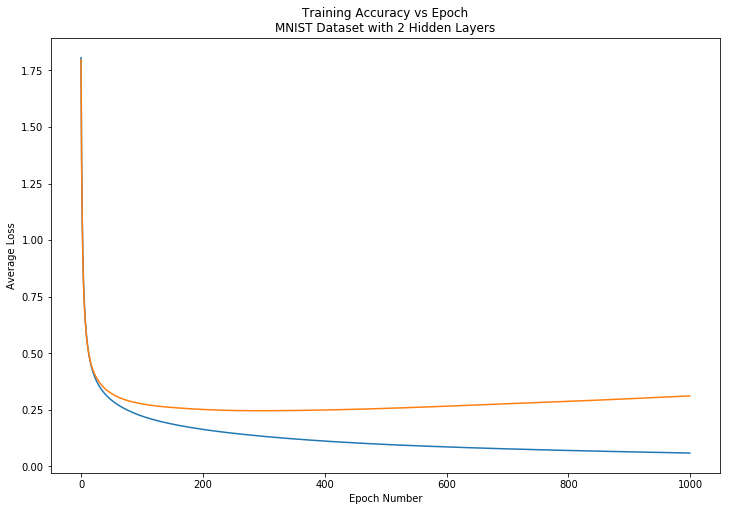

In [6]:
plt.figure(figsize=(12,8))
plt.title("Training Accuracy vs Epoch\nMNIST Dataset with 2 Hidden Layers")
plt.xlabel("Epoch Number")
plt.ylabel("Average Loss")
plt.plot(range(len(epoch_perf_mnist_2_train)), epoch_perf_mnist_2_train, label="train")
plt.plot(range(len(epoch_perf_mnist_2_val)), epoch_perf_mnist_2_val, label="val")

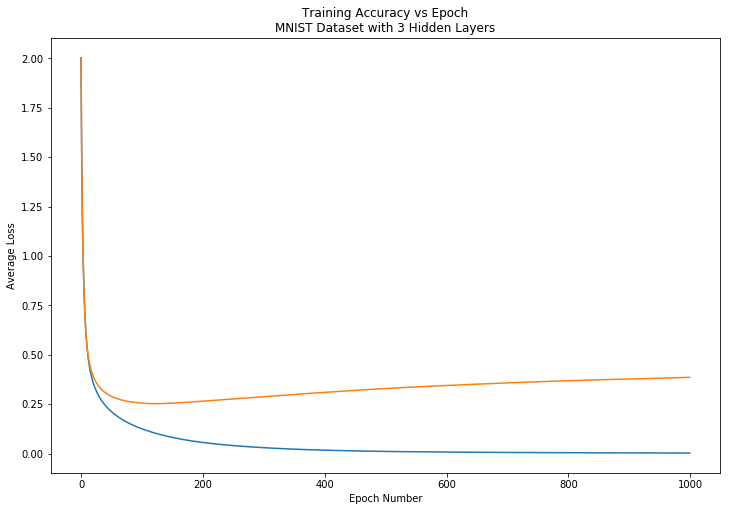

In [7]:
plt.figure(figsize=(12,8))
plt.title("Training Accuracy vs Epoch\nMNIST Dataset with 3 Hidden Layers")
plt.xlabel("Epoch Number")
plt.ylabel("Average Loss")
plt.plot(range(len(epoch_perf_mnist_3_train)), epoch_perf_mnist_3_train, label="train")
plt.plot(range(len(epoch_perf_mnist_3_val)), epoch_perf_mnist_3_val, label="val")

From the previous two plots, we can see that validation performance actually worsens as we continue to train on the data. For the two layers network this appears to occur after about the 150th epcoh and for the three layer network this appears to occur after about the 130th epoch. So we should take the weights from before these epochs as our final neural network. I will choose the 140th epoch for the 2 layer network and the 110 epoch for the 3 layer network.

In [12]:
epoch_2 = 140

nn_2.set_weights(epoch_2)

pre_train = nn_2.predict(train_images, train_labels)
pre_val = nn_2.predict(val_images, val_labels)
pre_test = nn_2.predict(test_images, test_labels)

nn_2.set_weights(-1)

print(f"MNIST 2-Layer Scores")
print(f"Train Score: {nn_2.score(pre_train, train_labels)*100:.2f}% Correct")
print(f"Val   Score: {nn_2.score(pre_val, val_labels)*100:.2f}% Correct")
print(f"Test  Score: {nn_2.score(pre_test, test_labels)*100:.2f}% Correct")
print()

epoch_3 = 110
pre_train = nn_3.predict(train_images, train_labels)
pre_val = nn_3.predict(val_images, val_labels)
pre_test = nn_3.predict(test_images, test_labels)

print(f"MNIST 3-Layer Scores")
print(f"Train Score: {nn_3.score(pre_train, train_labels)*100:.2f}% Correct")
print(f"Val   Score: {nn_3.score(pre_val, val_labels)*100:.2f}% Correct")
print(f"Test  Score: {nn_3.score(pre_test, test_labels)*100:.2f}% Correct")

MNIST 2-Layer Scores
Train Score: 94.30% Correct
Val   Score: 92.36% Correct
Test  Score: 92.73% Correct

MNIST 3-Layer Scores
Train Score: 99.98% Correct
Val   Score: 93.75% Correct
Test  Score: 93.68% Correct


Our tests score do rather well if over 90% accuracy with little preprocessing on the data. Both neural networks were a success.

Now let's do the same with the famous indian pines dataset. First we need to read in the indian pines dataset.

In [13]:
inputs, targets, val_inputs, val_targets, test_inputs, test_targets = read_indian.read_indian()

Train a 2-layer (2 hidden layers) neural network and get the epoch performance for indian pines dataset. Each hidden layer will have 20 nodes. We choose 5000 epochs, a batch size of 500, loss of softmax and a learning rate of 0.0001. The first hidden layer uses a relu activation function and the second uses a sigmoid activation. The weights are randomly initialized with N(0,1) by default.

In [23]:
num_epochs, batch_size = 5000, 500

nn_2_2 = mlp.MLP(shape=(inputs.shape[1], 20, 20, targets.shape[1]), \
                 batch_size=batch_size, \
                 hidden_activation=["relu", "sigmoid"], \
                 loss="softmax", \
                 num_epochs=num_epochs, \
                 eta=0.0001, \
                 progress_epoch=100, \
                 track_epoch=True
                 )

nn_2_2.train(inputs, targets, val_data=(val_inputs, val_targets))

epoch_perf_2_2_train, epoch_perf_2_2_val = nn_2_2.get_epoch_performance()

Train a 3-layer (3 hidden layers) neural network and get the epoch performance for indian pines dataset. The first hidden layer has 25 nodes, the second has 20 nodes, and the third has 12. We choose 4000 epochs, a batch size of 500, hinge loss and a learning rate of 0.0001. All hidden layers use sigmoid activation by default. We initialize the weights to zero.

In [26]:
num_epochs, batch_size = 4000, 500
nn_3_2 = mlp.MLP(shape=(inputs.shape[1], 25, 20, 12, targets.shape[1]), \
                 batch_size=batch_size, \
                 loss="hinge", \
                 num_epochs=num_epochs, \
                 eta=0.0001, \
                 progress_epoch=100, \
                 track_epoch=True, \
                 weight_init="zero"
                 )

nn_3_2.train(inputs, targets, val_data=(val_inputs, val_targets))

epoch_perf_3_2_train, epoch_perf_3_2_val = nn_3_2.get_epoch_performance()

Plot training accuracy vs epoch indian

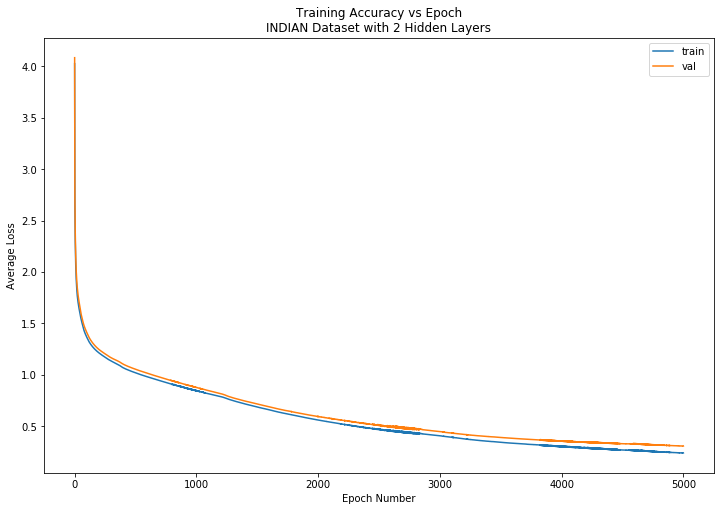

In [16]:
plt.figure(figsize=(12,8))
plt.title("Training Accuracy vs Epoch\nINDIAN Dataset with 2 Hidden Layers")
plt.xlabel("Epoch Number")
plt.ylabel("Average Loss")
plt.plot(range(len(epoch_perf_2_2_train)), epoch_perf_2_2_train, label="train")
plt.plot(range(len(epoch_perf_2_2_val)), epoch_perf_2_2_val, label="val")
plt.legend()

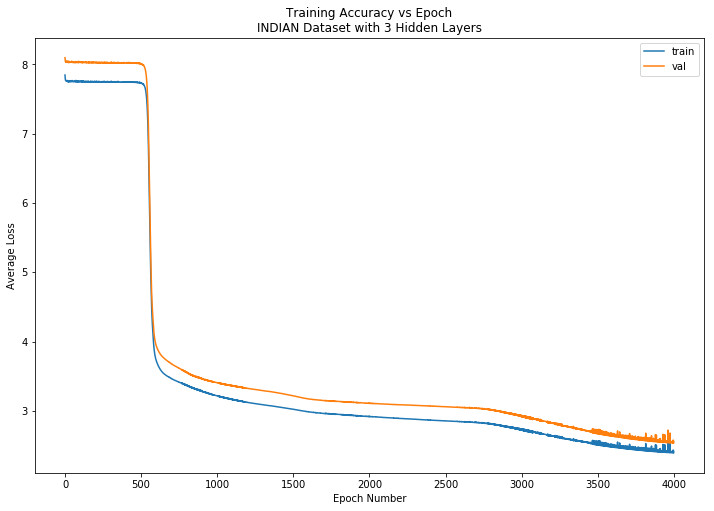

In [27]:
plt.figure(figsize=(12,8))
plt.title("Training Accuracy vs Epoch\nINDIAN Dataset with 3 Hidden Layers")
plt.xlabel("Epoch Number")
plt.ylabel("Average Loss")
plt.plot(range(len(epoch_perf_3_2_train)), epoch_perf_3_2_train, label="train")
plt.plot(range(len(epoch_perf_3_2_val)), epoch_perf_3_2_val, label="val")
plt.legend()

It is important to check if we have overfit our data so let us compare the train score versus test score to see how we did.

In [28]:
epoch_2 = -1

nn_2_2.set_weights(epoch_2)

pre_train = nn_2_2.predict(inputs, targets)
pre_val = nn_2_2.predict(val_inputs, val_targets)
pre_test = nn_2_2.predict(test_inputs, test_targets)

print(f"INDIAN 2-Layer Scores")
print(f"Train Score: {nn_2_2.score(pre_train, targets)*100:.2f}% Correct")
print(f"Val   Score: {nn_2_2.score(pre_val, val_targets)*100:.2f}% Correct")
print(f"Test  Score: {nn_2_2.score(pre_test, test_targets)*100:.2f}% Correct")
print()

epoch_3 = -1

nn_3_2.set_weights(epoch_3)

pre_train = nn_3_2.predict(inputs, targets)
pre_val = nn_3_2.predict(val_inputs, val_targets)
pre_test = nn_3_2.predict(test_inputs, test_targets)

print(f"INDIAN 3-Layer Scores")
print(f"Train Score: {nn_3_2.score(pre_train, targets)*100:.2f}% Correct")
print(f"Val   Score: {nn_3_2.score(pre_val, val_targets)*100:.2f}% Correct")
print(f"Test  Score: {nn_3_2.score(pre_test, test_targets)*100:.2f}% Correct")

INDIAN 2-Layer Scores
Train Score: 92.00% Correct
Val   Score: 89.23% Correct
Test  Score: 88.45% Correct

INDIAN 3-Layer Scores
Train Score: 50.68% Correct
Val   Score: 50.36% Correct
Test  Score: 51.15% Correct


It is clear that the hinge loss does not work well for this dataset while the softmax did work well. The initital weights of zero also caused us to take a while to learn out of the hole caused by the zeroed weights. Initializing weights to zero is not a generally good strategy as compared to N(0,1). 